<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Heart Disease Model
                  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement



### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
confusion_matrix, classification_report, roc_curve, roc_auc_score,
accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
)


<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first ten observations.

In [12]:
df = pd.read_csv("Heart_disease.csv")

**Let us now see the number of variables and observations in the data.**

In [14]:
print("Shape:", df.shape)
df.head(10)

Shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [20]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

#### Change the data type as per the data definition.

In [23]:
#Binary_Categoricals
binary_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'CVD']
for col in binary_cols:
    df[col] = df[col].astype("category")

#Ordinal_Categoricals
df["education"] = df["education"].astype("category")

#### Recheck the data type after the conversion. 

In [26]:
df.dtypes

male               category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
CVD                category
dtype: object

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if exists.

In [29]:
#Checking for null
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [31]:
#Check unique values
df.nunique().sort_values()

male                  2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
CVD                   2
education             4
cigsPerDay           33
age                  39
heartRate            73
glucose             143
diaBP               146
sysBP               234
totChol             248
BMI                1364
dtype: int64

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

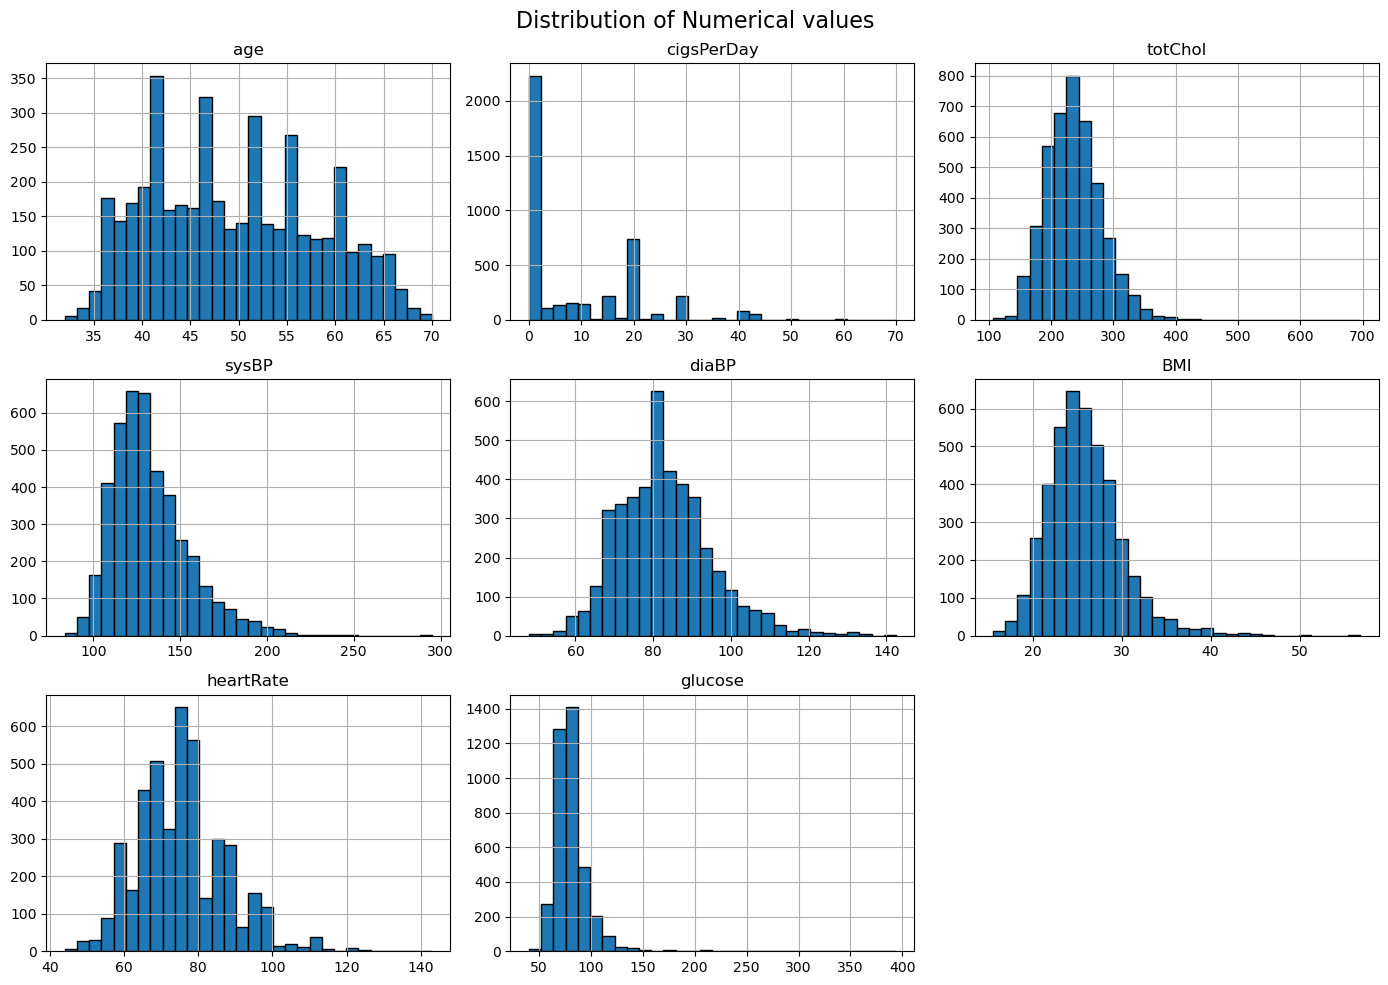

In [35]:
numeric_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
df[numeric_cols].hist(figsize=(14,10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical values", fontsize=16)
plt.tight_layout()
plt.show()

**Distribution of categoric independent variable.**

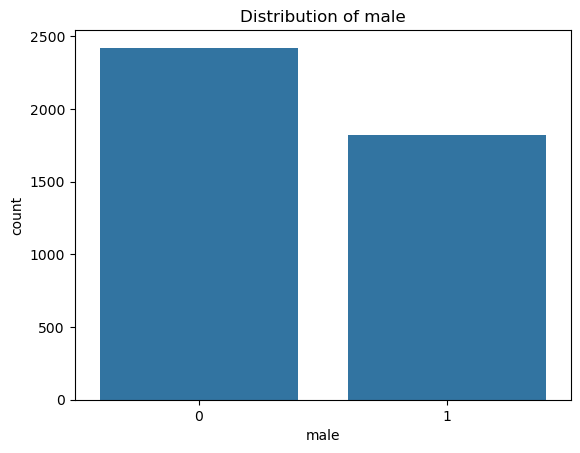

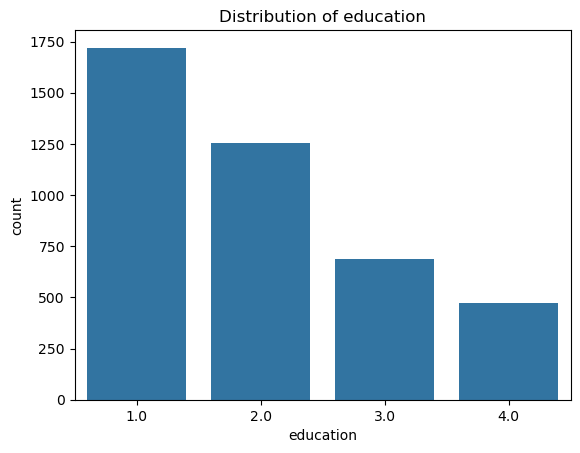

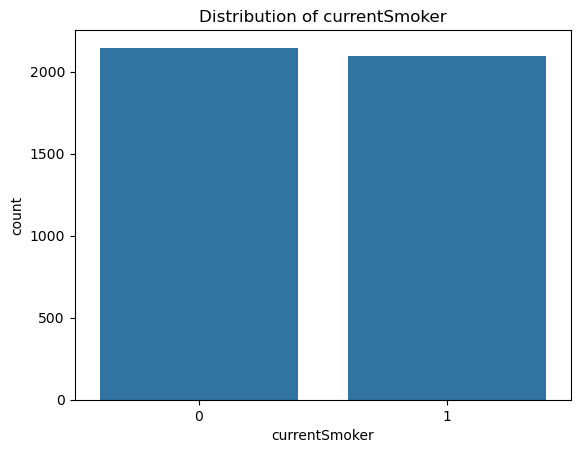

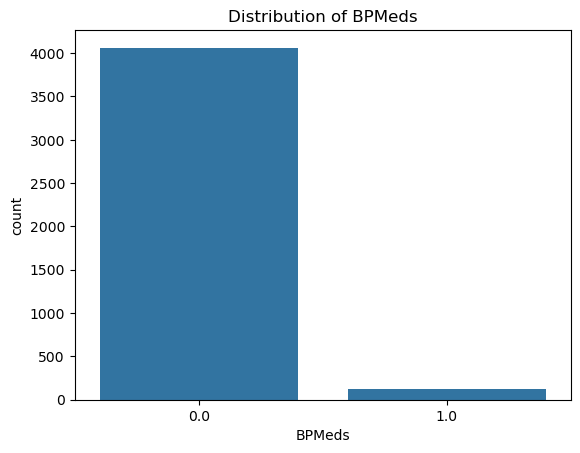

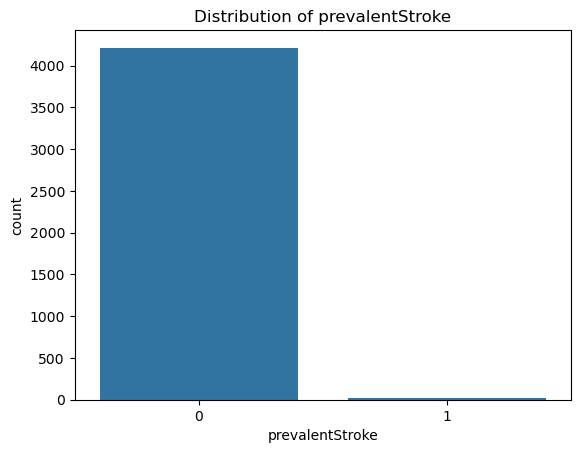

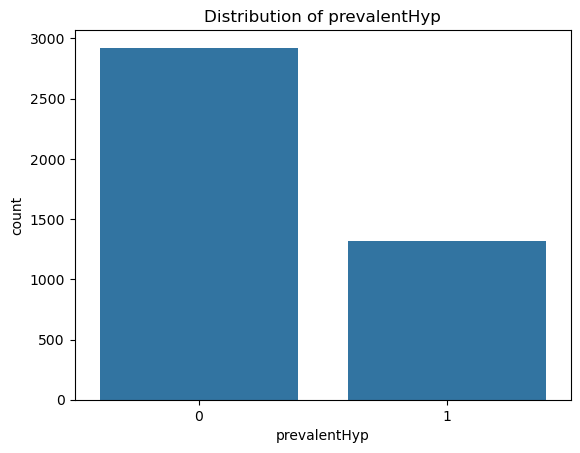

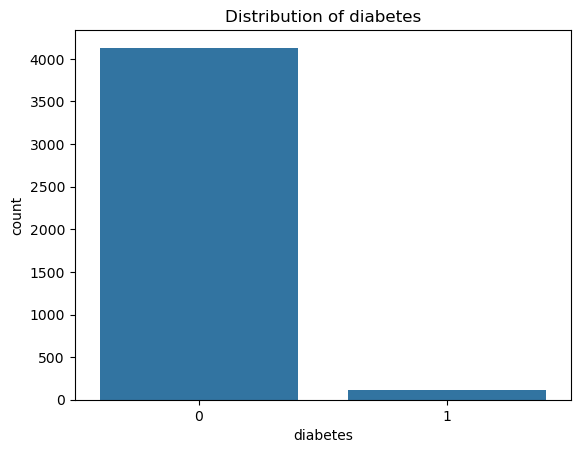

In [38]:
cat_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

#### Distribution of dependent variable.

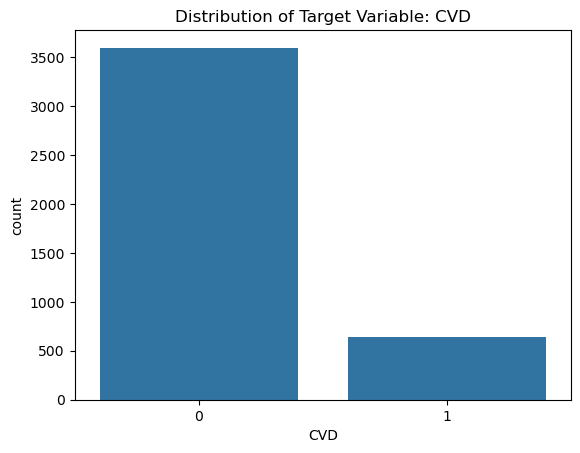

CVD
0    0.848113
1    0.151887
Name: proportion, dtype: float64

In [41]:
sns.countplot(x="CVD", data=df)
plt.title("Distribution of Target Variable: CVD")
plt.show()

df["CVD"].value_counts(normalize=True)

<a id="null"></a>
## 2.5 Missing Value Treatment

Check for the presence of missing values and their percentage for each column. If applicable, choose the right approach to treat them.

Is it a good approach to drop the records/columns with missing values? Why or why not?

In [46]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)

glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
CVD                0.000000
dtype: float64

In [48]:
#Categorical Variables
df["education"] = df["education"].fillna(df["education"].mode()[0])
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].mode()[0])

In [50]:
#Numerical Variables
num_missing_cols = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for col in num_missing_cols:
    df[col] = df[col].fillna(df[col].median())

Is it a good approach to drop the records/columns with missing values? Why or why not?


None of columns have higher missing values.
Even Glucose has 9.150943 ~ missing values

I am not dropping any columns because especially in Healthcare dataset every column related to patient health is valuable.
So Categorical columns treated with mode() & Numerical columns treated with median() to fill null values

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [56]:
X = df.drop("CVD", axis=1)
y = df["CVD"] 

#### Filter numerical and categorical variables.

In [59]:
#Identify numerical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(num_cols)
#Identify categorical column
cat_cols = X.select_dtypes(include=["category"]).columns.tolist()
print(cat_cols)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [62]:
X_encoded = pd.get_dummies(X[cat_cols], drop_first = True)

In [64]:
X_final = pd.concat([X[num_cols], X_encoded], axis=1)

<a id="split"></a>
## 2.7 Train-Test Split

Before applying various classification techniques to predict the patient having cardiovascular disease or not, let us split the dataset in train and test set.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

#Checking shape
print("Training_set:", X_train.shape)
print("Test_set:", X_test.shape)

Training_set: (2968, 17)
Test_set: (1272, 17)


<a id="scale"></a>
## 2.8 Scale the Data 

Why should we scale the variables?

Logistic regression uses gradient descent — features with larger ranges dominate the optimization.

Unscaled features can lead to biased coefficients and poor convergence.

StandardScaler transforms features to have mean = 0 and std = 1, making them comparable.

In [72]:
numeric_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [74]:
#Apply StandardScaler
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled_num = scaler.fit_transform(X_test[numeric_cols])

In [76]:
#Convert back to DataFrame
X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numeric_cols, index=X_train.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numeric_cols, index=X_test.index)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [79]:
# Get encoded categorical columns
cat_encoded_cols = [col for col in X_train.columns if col not in numeric_cols]

X_train_final = pd.concat([X_train_scaled_num, X_train[cat_encoded_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_num, X_test[cat_encoded_cols]], axis=1)

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [99]:
# Convert all boolean columns to int
X_train_fixed = X_train_final.copy()
X_train_fixed = X_train_fixed.astype({col: 'int' for col in X_train_fixed.select_dtypes('bool').columns})

# Add constant
X_train_sm = sm.add_constant(X_train_fixed)

# Fit the model
logit_model = sm.Logit(y_train.astype(int), X_train_sm).fit()

# Summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.371869
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2950
Method:                           MLE   Df Model:                           17
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                  0.1272
Time:                        13:58:38   Log-Likelihood:                -1103.7
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                 3.476e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1569      0.148    -14.528      0.000      -2.448      -1.866
age     

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

AIC is printed in the model summary.

Lower AIC = better model (balance of fit and simplicity).

Use it to compare with future models (e.g., after feature selection).

We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [102]:
# Get odds ratios
odds_ratios = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'Odds Ratio': np.exp(logit_model.params),
    'p-value': logit_model.pvalues
})
odds_ratios.sort_values(by='Odds Ratio', ascending=False)

,Feature,Odds Ratio,p-value
prevalentStroke_1,prevalentStroke_1,3.574611,1.303956e-02
age,age,1.794632,5.601018e-19
BPMeds_1.0,BPMeds_1.0,1.619104,7.088347e-02
male_1,male_1,1.478681,1.423606e-03
cigsPerDay,cigsPerDay,1.382915,8.186536e-05
sysBP,sysBP,1.321307,2.978521e-03
glucose,glucose,1.198342,3.353960e-03
prevalentHyp_1,prevalentHyp_1,1.196319,2.457501e-01
totChol,totChol,1.153645,9.242061e-03
education_4.0,education_4.0,1.076458,6.852845e-01


**Interpretation:** 

Write the interpretation of How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?

Strongest predictors: prevalentStroke_1, age, male_1, cigsPerDay, sysBP, glucose

Protective effect: education_2.0 (basic education), though borderline

Non-significant: BMI, heartRate, diabetes, currentSmoker, education_3.0/4.0

**Do predictions on the test set.**

In [107]:
# Convert boolean columns to int
X_test_fixed = X_test_final.copy()
X_test_fixed = X_test_fixed.astype({col: 'int' for col in X_test_fixed.select_dtypes('bool').columns})

In [109]:
# Add constant
X_test_sm = sm.add_constant(X_test_fixed)

# Align columns with training set
X_test_sm = X_test_sm[X_train_sm.columns]

In [111]:
# Predict probabilities
y_pred_prob = logit_model.predict(X_test_sm)

In [113]:
print(X_test_sm.dtypes.value_counts())  
print(X_test_sm.isnull().sum().sum())

float64    9
int64      9
Name: count, dtype: int64
0


In [115]:
y_pred_prob

737     0.082237
1030    0.199111
49      0.073160
1233    0.160387
3676    0.113355
          ...   
3355    0.162447
2068    0.048868
1076    0.089762
408     0.061138
1145    0.267019
Length: 1272, dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [117]:
# Apply 0.5 cutoff
y_pred = (y_pred_prob >= 0.5).astype(int)

# Preview
print("Binary predictions:\n", y_pred.head())

Binary predictions:
 737     0
1030    0
49      0
1233    0
3676    0
dtype: int64


#### Plot the confusion matrix.

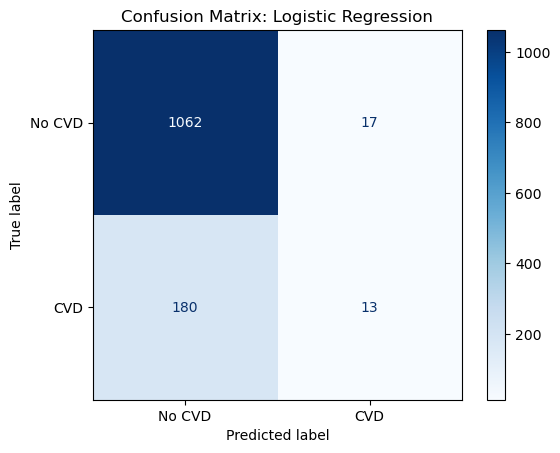

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test.astype(int), y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No CVD", "CVD"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()

**Compute various performance metrics.**

In [123]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, cohen_kappa_score
)

In [126]:
# Confusion matrix
cm = confusion_matrix(y_test.astype(int), y_pred)
TN, FP, FN, TP = cm.ravel()

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [130]:
precision = precision_score(y_test, y_pred)
print(precision)

0.43333333333333335


**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [132]:
recall = recall_score(y_test, y_pred)  # Sensitivity
print(recall)

0.06735751295336788


**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [136]:
specificity = TN / (TN + FP)
print(specificity)

0.9842446709916589


**f1-score:** It is defined as the harmonic mean of precision and recall.

In [138]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.11659192825112108


**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [142]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.845125786163522


**Interpretation:** Write inference regarding the accuracy of the logistic regression model.

The model achieved an accuracy of ~85%, meaning it correctly predicted CVD status for ~X% of patients.
However, accuracy alone can be misleading if the dataset is imbalanced — which is why recall, specificity, and F1-score matter more.

We can also calculate the above measures using the `classification_report()`

In [150]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1079
           1       0.43      0.07      0.12       193

    accuracy                           0.85      1272
   macro avg       0.64      0.53      0.52      1272
weighted avg       0.79      0.85      0.79      1272



**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [140]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.07899263441097348


The kappa score is ~79%. This measures agreement between predicted and actual labels beyond chance:

< 0.20 → slight agreement

0.21–0.40 → fair

0.41–0.60 → moderate

0.61–0.80 → substantial

> 0.80 → almost perfect

The model falls under Substantial, indicating efficient prediction.

**Interpretation:** Write the inference based on the kappa score value and this model falls under which agreeemnet.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

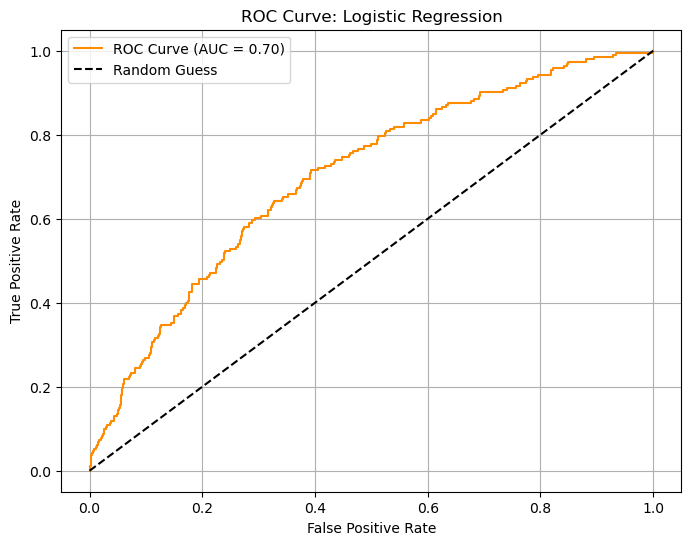

In [154]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:** Provide inference based on the obtained ROC curve and AUC score.

The ROC curve illustrates that the model’s ability to distinguish between patients with and without cardiovascular disease
across all classification thresholds. An AUC score of 0.70 indicates that the model has good discriminative power
it can correctly rank a randomly chosen positive case higher than a randomly chosen negative case 70% of the time.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

<a id="youden"></a>
### 3.1.1 Youden's Index

In [159]:
from sklearn.metrics import roc_curve

# Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_prob)

# Compute Youden's Index
youden_index = tpr - fpr
best_threshold = thresholds[np.argmax(youden_index)]

print(f"Best Cut-off (Youden's Index): {best_threshold:.3f}")

Best Cut-off (Youden's Index): 0.131


#### Plot the confusion matrix, with the optimal threshold computed using Youden's index method.

In [161]:
# Apply Youden's Index threshold
y_pred_optimal = (y_pred_prob >= 0.131).astype(int)

In [163]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score
)

# Confusion matrix
cm_opt = confusion_matrix(y_test.astype(int), y_pred_optimal)
TN, FP, FN, TP = cm_opt.ravel()

# Metrics
accuracy_opt = accuracy_score(y_test, y_pred_optimal)
precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
specificity_opt = TN / (TN + FP)
f1_opt = f1_score(y_test, y_pred_optimal)
kappa_opt = cohen_kappa_score(y_test, y_pred_optimal)

# Classification report
print("\nClassification Report (Optimal Cut-off):\n", classification_report(y_test, y_pred_optimal))


Classification Report (Optimal Cut-off):
               precision    recall  f1-score   support

           0       0.92      0.61      0.73      1079
           1       0.25      0.72      0.37       193

    accuracy                           0.62      1272
   macro avg       0.58      0.66      0.55      1272
weighted avg       0.82      0.62      0.68      1272



**Compute various performance metrics using classification report.**

**Interpretation:** From the above output, write your inference.

High recall for CVD (0.72): The model is effective at catching most true CVD cases — a critical strength in healthcare.

Low precision for CVD (0.25): Many predicted CVD cases are false positives — expected when using a low threshold like 0.131.

Accuracy (62%): Lower than the default threshold, but acceptable given the trade-off for higher sensitivity.

F1-score for CVD (0.37): Indicates imbalance between precision and recall — but still useful for early screening.

Macro vs Weighted Avg: Macro treats both classes equally; weighted reflects dominance of non-CVD cases.

By lowering the threshold to 0.131, the model prioritizes recall — catching more true CVD cases,
which is often preferred in medical diagnostics. Although this increases false positives (lower precision),
It reduces the risk of missing actual patients with cardiovascular disease. The model is well-suited for screening,
where early detection is more important than precision.